In [94]:
import tensorflow as tf
import edward as ed

import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
cmap = plt.cm.Set1

%matplotlib inline

# 図10.4

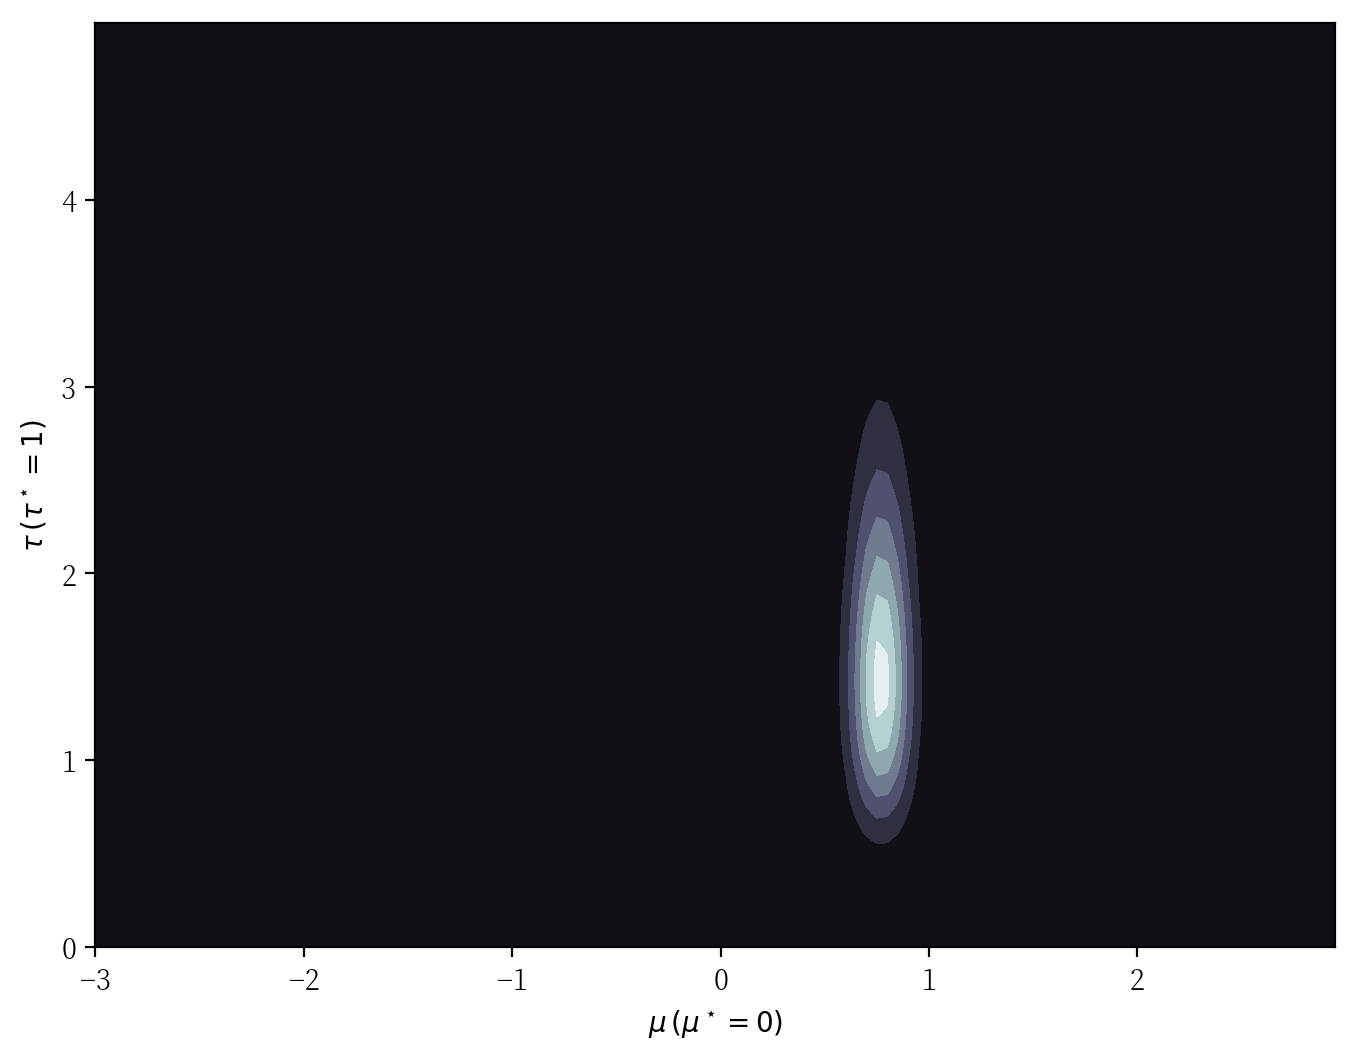

In [90]:
from scipy.stats import gamma, norm

class GaussVariational:
    def __init__(self, X, mu0, lam0, a0, b0):
        self.X = np.array(X)
        self.N = self.X.shape[0]
        
        # hyper parameters
        self.mu0 = mu0
        self.lam0 = lam0
        self.a0 = a0
        self.b0 = b0
        
        # prior
        self.muN = mu0
        self.lamN = lam0
        self.aN = a0
        self.bN = b0
        
        self.L = 0
    
    def q_pdf(self, mu, tau):
        q_pdf_mu  = norm(loc=self.muN, scale=1. / self.lamN).pdf(mu)
        q_pdf_tau = gamma(a=self.aN, scale=1. / self.bN).pdf(tau)
        return q_pdf_mu * q_pdf_tau
    
    def update_q_mu(self):
        E_tau = 1. * self.aN / self.bN
        self.muN = (self.lam0 * self.mu0 + self.N * self.X.mean()) / (self.lam0 + self.N)
        self.lamN = (self.lam0 + self.N) * E_tau
    
    def update_q_tau(self):
        E_mu  = self.muN
        E_mu2 = E_mu**2 + (1. / self.lamN)
        self.aN = self.a0 + (self.N + 1)/2.0
        self.bN = self.b0 + (self.lam0+self.N) * E_mu2 / 2.0 - (self.X.sum() + self.mu0 * self.mu0) * E_mu + ((self.X**2).sum() + self.lam0 * self.mu0**2) / 2.0
                
    def update(self):
        self.update_q_mu()
        self.update_q_tau()
        self.L += 1
                
    def plot_scatter(self, ax=None):
        if ax is None:
            ax = plt.gca()
            
        x_min, x_max = (-3, 3)
        y_min, y_max = (0, 5)
        h = .05
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        zz = self.q_pdf(xx.ravel(), yy.ravel())
        Z = zz.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.bone)
        ax.set(xlabel='$\\mu \\,(\\mu^\\star=0)$', ylabel='$\\tau \\,(\\tau^\\star = 1)$')
        
X = np.random.normal(0, 2, 4)

gauss = GaussVariational(X, 2, 1, 4, 2)

for _ in range(1):
    gauss.update()

gauss.plot_scatter()

In [104]:
A = np.diag([1,2,3])
np.linalg.det(A)

6.0

In [108]:
np.linalg.det(3*A) / 6

161.99999999999994